<a href="https://colab.research.google.com/github/amityadav108/Project_Weather_Data_Analysis_and_Prediction/blob/main/Project_Weather_Data_Analysis_and_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Title- 🌦️ Weather Data Analysis and Prediction

## Objective - Analyze historical weather data to :
* Understand weather patterns (EDA)
* Visualize trends in temperature, humidity, and rainfall
* Build a regression model to predict future temperature trends

In [ ]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
import datetime as dt

### Load and Inspect Data

In [ ]:
# Load Data
df = pd.read_csv("Weather Data.csv")

# Print first 5 rows
print("First 5 Rows of Dataset: ")
display(df.head())

# Check basic info
print("\n Data Info:")
df.info()

# Chech for missing values
print("\n Missing Values :")
print(df.isnull().sum())

# Check Statistics
print("\n Data Summary:")
display(df.describe())

First 5 Rows of Dataset: 


,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog



 Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB

 Missing Values :
Date/Time           0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64

 Data Summary:


,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
std,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000


### Data Cleaning and Preprocessing

In [ ]:
# Convert date column
df['Date/Time'] = pd.to_datetime(df['Date/Time'])

# sort the data by date
df = df.sort_values('Date/Time')

# Create extra time-based columns for anlysis
df['Year'] = df['Date/Time'].dt.year
df['Month'] = df['Date/Time'].dt.month
df['Day'] = df['Date/Time'].dt.day
df['Hour'] = df['Date/Time'].dt.hour

# Check Cleaned Data
print("Cleaned Data Sample:")
display(df.head())

Cleaned Data Sample:


,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Year,Month,Day,Hour
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog,2012,1,1,0
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog,2012,1,1,1
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog",2012,1,1,2
3,2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog",2012,1,1,3
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog,2012,1,1,4


### EDA(Exploratory Data Analysis)

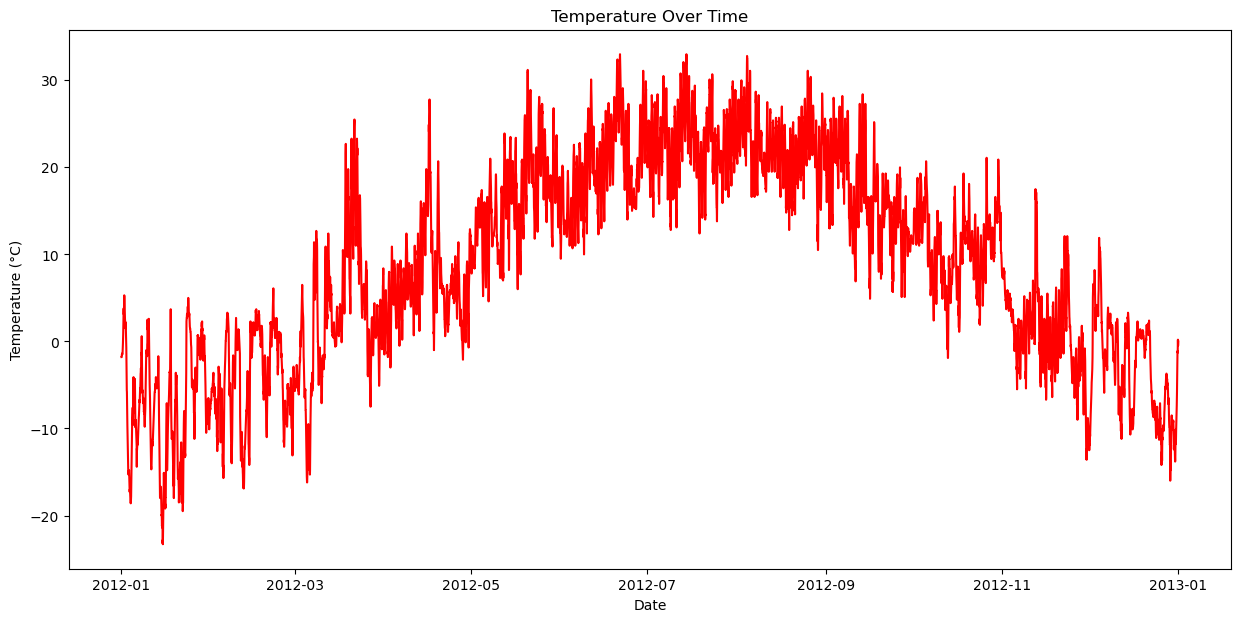

In [ ]:
# Temperature Trends Over Time

plt.figure(figsize = (15,7))
plt.plot(df['Date/Time'], df['Temp_C'], color='red')
plt.title("Temperature Over Time")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.show()

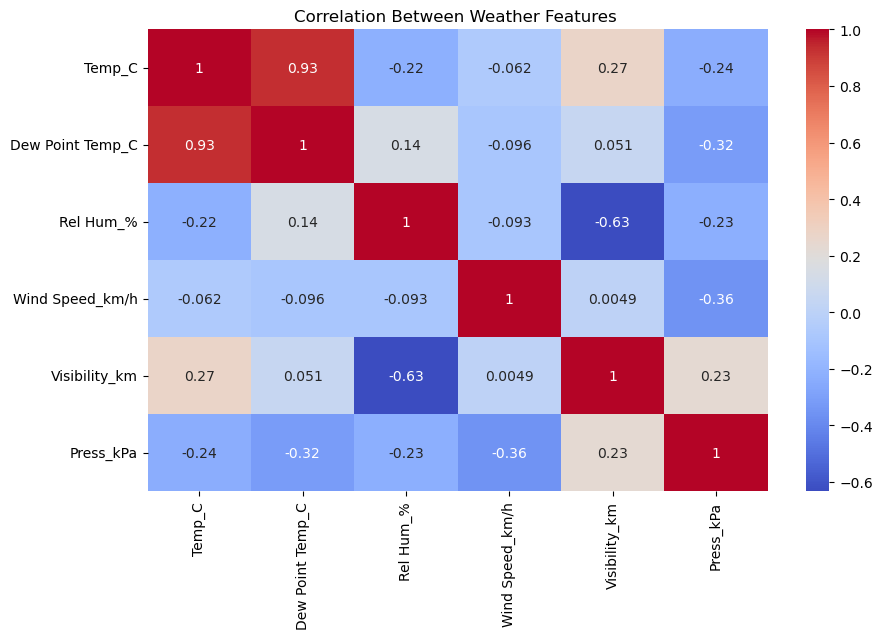

In [ ]:
# Relationship Between Temperature and Other Factor

plt.figure(figsize=(10,6))
sns.heatmap(df[['Temp_C', 'Dew Point Temp_C','Rel Hum_%','Wind Speed_km/h','Visibility_km', 'Press_kPa']].corr(),annot=True, cmap='coolwarm')
plt.title("Correlation Between Weather Features ")
plt.show()

### Observation:
* Temperature and Dew Point are strongly correlated.
* Humidity is moderately related to temperature

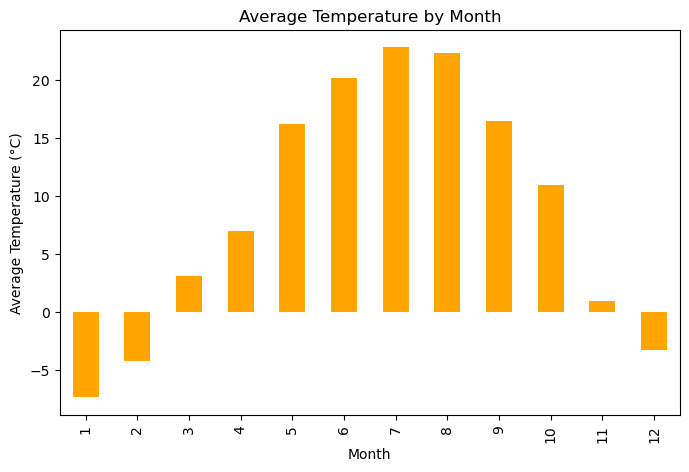

In [ ]:
# Average Monthly Temperature

monthly_avg = df.groupby('Month')['Temp_C'].mean()

plt.figure(figsize = (8,5))
monthly_avg.plot(kind='bar', color = 'orange')
plt.title('Average Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Average Temperature (°C)')
plt.show()

### Feature Selection for Prediction
We will predict temperature (Temp_C) using other numerical weather features.

In [ ]:
# Selecting useful columns
features = ['Dew Point Temp_C','Rel Hum_%', 'Wind Speed_km/h','Visibility_km', 'Press_kPa']
target = 'Temp_C'

X = df[features]
y = df[target]

### Train-Test Split
We’ll train the model on 80% of the data and test it on 20%.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Data Shape: {X_train.shape}")
print(f"Testing Data Shape: {X_test.shape}")

Training Data Shape: (7027, 5)
Testing Data Shape: (1757, 5)


### Model Training (Linear Regression)
We will use a simple Linear Regression model for prediction.

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

print("Model Training completed")

Model Training completed


### Make Prediction

In [ ]:
y_pred = model.predict(X_test)

# Compare actual vs predicted values
comparision = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
print("Sample Prediction: ")
display(comparision.head(10))

Sample Prediction: 


,Actual,Predicted
0,12.8,12.884437
1,1.0,1.408071
2,12.6,12.508027
3,11.7,12.072267
4,-11.6,-10.714693
5,21.1,21.499991
6,-9.6,-9.879332
7,19.6,19.974518
8,24.2,23.547054
9,-15.2,-14.467889


### Model Evaluation

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Model Performance: ")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse: .2f}")
print(f"R² Score: {r2: .2f}")

Model Performance: 
Mean Absolute Error (MAE): 0.61
Root Mean Squared Error (RMSE):  0.83
R² Score:  1.00


### Visualize Actual vs Predicted Temperature

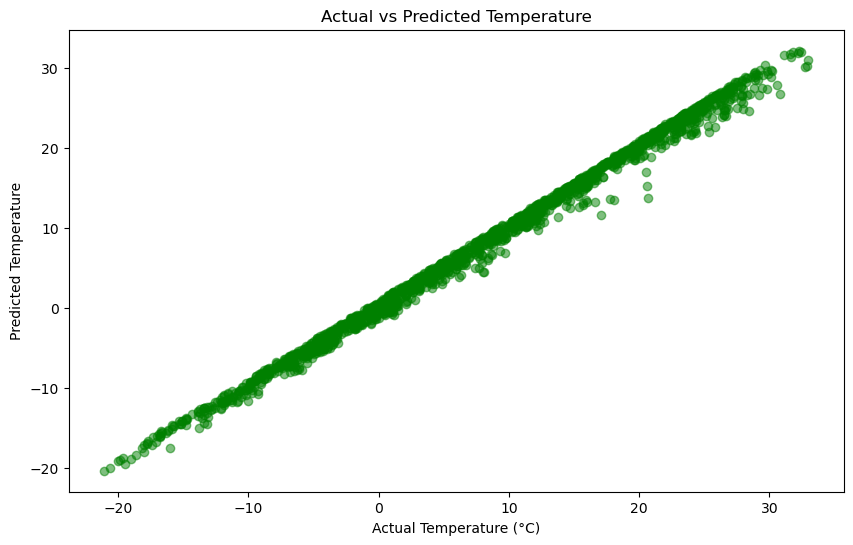

In [ ]:
plt.figure(figsize = (10,6))
plt.scatter(y_test, y_pred, color = 'green', alpha =0.5)
plt.title("Actual vs Predicted Temperature")
plt.xlabel("Actual Temperature (°C)")
plt.ylabel("Predicted Temperature")
plt.show()

### Predict Temperature for New Weather Conditions
Example: Predict temperature given new weather data.

In [ ]:
# Example: New data (Dew Point, Humidity, Wind Speed, Visibility, Pressure)
new_data = pd.DataFrame({
    'Dew Point Temp_C': [10],
    'Rel Hum_%': [80],
    'Wind Speed_km/h': [10],
    'Visibility_km': [15],
    'Press_kPa': [101.2]
})

predicted_temp = model.predict(new_data)
print(f"Predicted Temperature: {predicted_temp[0]:.2f} °C")


Predicted Temperature: 13.56 °C
